In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Data_raw_punctuality_202202.csv")
df.head()

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,PLANNED_TIME_DEP,DELAY_ARR,DELAY_DEP,RELATION_DIRECTION,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP
0,01FEB2022,18446,EXTRA,SNCB/NMBS,726,37,NaN,19:10:33,NaN,19:10:00,NaN,33.0,NaN,LIEGE-GUILLEMINS,NaN,NaN,01FEB2022,NaN,01FEB2022
1,01FEB2022,18446,EXTRA,SNCB/NMBS,208,40,19:17:29,19:18:03,19:17:00,19:18:00,29.0,3.0,NaN,BRESSOUX,40,01FEB2022,01FEB2022,01FEB2022,01FEB2022
2,01FEB2022,18446,EXTRA,SNCB/NMBS,1195,NaN,19:26:55,NaN,19:28:00,NaN,-65.0,NaN,NaN,VISE,40,01FEB2022,NaN,01FEB2022,NaN
3,01FEB2022,3844,IC 25,SNCB/NMBS,562,34,NaN,22:06:16,NaN,22:06:00,NaN,16.0,IC 25: HERSTAL -> MONS,HERSTAL,NaN,NaN,01FEB2022,NaN,01FEB2022
4,01FEB2022,3844,IC 25,SNCB/NMBS,730,34,22:10:09,22:13:03,22:11:00,22:13:00,-51.0,3.0,IC 25: HERSTAL -> MONS,LIEGE-SAINT-LAMBERT,34,01FEB2022,01FEB2022,01FEB2022,01FEB2022


In [3]:
df.shape

(1716175, 19)

The initial shape of the data in the month of **February** alone is 1,716,175 rows and 19 columns

## Variable definition

    DATDEP - Date of departure
    TRAIN_NO - Train number
    RELATION - Relation
    TRAIN_SERV - Railway operator
    PTCAR_NO - Measuring point number
    LINE_NO_DEP - Departure line
    REAL_TIME_ARR - Actual arrival time
    REAL_TIME_DEP - Actual departure time
    PLANNED_TIME_ARR - Planned arrival time
    PLANNED_TIME_DEP - Planned departure time
    DELAY_ARR - Delay at arrival
    DELAY_DEP - Delay at departure
    RELATION_DIRECTION - Relation direction
    PTCAR_LG_NM_NL - Stopping place
    LINE_NO_ARR - Arrival line
    PLANNED_DATE_ARR - Planned arrival date
    PLANNED_DATE_DEP - Planned departure date
    REAL_DATE_ARR - Actual arrival date
    REAL_DATE_DEP - Actual departure date

In [4]:
df.isnull().sum()

DATDEP                     0
TRAIN_NO                   0
RELATION                   0
TRAIN_SERV                 0
PTCAR_NO                   0
LINE_NO_DEP            83451
REAL_TIME_ARR          83345
REAL_TIME_DEP          83287
PLANNED_TIME_ARR       83345
PLANNED_TIME_DEP       83287
DELAY_ARR              83344
DELAY_DEP              83286
RELATION_DIRECTION    112003
PTCAR_LG_NM_NL             0
LINE_NO_ARR            83511
PLANNED_DATE_ARR       83345
PLANNED_DATE_DEP       83287
REAL_DATE_ARR          83345
REAL_DATE_DEP          83287
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716175 entries, 0 to 1716174
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   DATDEP              object 
 1   TRAIN_NO            int64  
 2   RELATION            object 
 3   TRAIN_SERV          object 
 4   PTCAR_NO            int64  
 5   LINE_NO_DEP         object 
 6   REAL_TIME_ARR       object 
 7   REAL_TIME_DEP       object 
 8   PLANNED_TIME_ARR    object 
 9   PLANNED_TIME_DEP    object 
 10  DELAY_ARR           float64
 11  DELAY_DEP           float64
 12  RELATION_DIRECTION  object 
 13  PTCAR_LG_NM_NL      object 
 14  LINE_NO_ARR         object 
 15  PLANNED_DATE_ARR    object 
 16  PLANNED_DATE_DEP    object 
 17  REAL_DATE_ARR       object 
 18  REAL_DATE_DEP       object 
dtypes: float64(2), int64(2), object(15)
memory usage: 248.8+ MB


Based on the overview of the data, **df.RELATION_DIRECTION** is the path of the train. Without this prior knowledge for a certain row, it would be hard to continue it, that's why I am choosing to drop the rows with a null values.

For the columns 'LINE_NO_DEP', 'REAL_TIME_ARR', 'LINE_NO_ARR', I will also drop them to make a better understanding of the data. Remember that the main feature of the prediction analysis is the 'REAL_TIME_ARR', 'REAL TIME_DEP', 'DELAY_ARR', 'DELAY_DEP'

In [6]:
df = df.dropna(subset=['RELATION_DIRECTION', 'LINE_NO_DEP', 'REAL_TIME_ARR', 'LINE_NO_ARR'])

In [7]:
df.isnull().sum()

DATDEP                0
TRAIN_NO              0
RELATION              0
TRAIN_SERV            0
PTCAR_NO              0
LINE_NO_DEP           0
REAL_TIME_ARR         0
REAL_TIME_DEP         0
PLANNED_TIME_ARR      0
PLANNED_TIME_DEP      0
DELAY_ARR             0
DELAY_DEP             0
RELATION_DIRECTION    0
PTCAR_LG_NM_NL        0
LINE_NO_ARR           0
PLANNED_DATE_ARR      0
PLANNED_DATE_DEP      0
REAL_DATE_ARR         0
REAL_DATE_DEP         0
dtype: int64

In [8]:
print("new df shape:", df.shape)

new df shape: (1457593, 19)


1,457,593 is still a good number of rows for the month of February

## Data Transformation


- The following 4 columns can be transformed from object into Time dtype:

        REAL_TIME_ARR, REAL_TIME_DEP, PLANNED_TIME_ARR, PLANNED_TIME_DEP
    
- The following columns can be transformed into a Date object:

        DATDEP, PLANNED_DATE_ARR, PLANNED_DATE_DEP, REAL_DATE_ARR, REAL_DATE_DEP 
     
- The following columns are candidates to have categorical values:

        TRAIN_NO, RELATION, TRAIN_SERV

In [9]:
#converting the object type to Hour:Minute:Second datetime type
df.REAL_TIME_ARR = pd.to_datetime(df.REAL_TIME_ARR, format='%H:%M:%S').dt.time
df.REAL_TIME_DEP = pd.to_datetime(df.REAL_TIME_DEP, format='%H:%M:%S').dt.time
df.PLANNED_TIME_ARR = pd.to_datetime(df.PLANNED_TIME_ARR, format='%H:%M:%S').dt.time
df.PLANNED_TIME_DEP = pd.to_datetime(df.PLANNED_TIME_DEP, format='%H:%M:%S').dt.time

#converting the object type (01FEB2022) to %d%b%Y (2022-02-01) datetime type
df.DATDEP = pd.to_datetime(df.DATDEP, format='%d%b%Y')
df.PLANNED_DATE_ARR = pd.to_datetime(df.PLANNED_DATE_ARR, format="%d%b%Y")
df.PLANNED_DATE_DEP = pd.to_datetime(df.PLANNED_DATE_DEP, format="%d%b%Y")
df.REAL_DATE_ARR = pd.to_datetime(df.REAL_DATE_ARR, format='%d%b%Y')
df.REAL_DATE_DEP = pd.to_datetime(df.REAL_DATE_DEP, format='%d%b%Y')

#converting some types to a object to categorical type, since categorical consumes less memory
df.TRAIN_NO = pd.Categorical(df.TRAIN_NO)
df.RELATION = pd.Categorical(df.RELATION)
df.TRAIN_SERV = pd.Categorical(df.TRAIN_SERV)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457593 entries, 4 to 1716088
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   DATDEP              1457593 non-null  datetime64[ns]
 1   TRAIN_NO            1457593 non-null  category      
 2   RELATION            1457593 non-null  category      
 3   TRAIN_SERV          1457593 non-null  category      
 4   PTCAR_NO            1457593 non-null  int64         
 5   LINE_NO_DEP         1457593 non-null  object        
 6   REAL_TIME_ARR       1457593 non-null  object        
 7   REAL_TIME_DEP       1457593 non-null  object        
 8   PLANNED_TIME_ARR    1457593 non-null  object        
 9   PLANNED_TIME_DEP    1457593 non-null  object        
 10  DELAY_ARR           1457593 non-null  float64       
 11  DELAY_DEP           1457593 non-null  float64       
 12  RELATION_DIRECTION  1457593 non-null  object        
 13  PTCAR_LG_NM_

In [11]:
df.tail(5)

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,PLANNED_TIME_DEP,DELAY_ARR,DELAY_DEP,RELATION_DIRECTION,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP
1716084,2022-02-28,836,IC 32,SNCB/NMBS,606,66,15:29:17,15:29:55,15:29:00,15:30:00,17.0,-5.0,IC 32: KORTRIJK -> BRUGGE,IZEGEM,66,2022-02-28,2022-02-28,2022-02-28,2022-02-28
1716085,2022-02-28,836,IC 32,SNCB/NMBS,1005,66,15:34:55,15:36:36,15:35:00,15:36:00,-5.0,36.0,IC 32: KORTRIJK -> BRUGGE,ROESELARE,66,2022-02-28,2022-02-28,2022-02-28,2022-02-28
1716086,2022-02-28,836,IC 32,SNCB/NMBS,724,66,15:42:14,15:43:22,15:42:00,15:43:00,14.0,22.0,IC 32: KORTRIJK -> BRUGGE,LICHTERVELDE,66,2022-02-28,2022-02-28,2022-02-28,2022-02-28
1716087,2022-02-28,836,IC 32,SNCB/NMBS,1152,66,15:47:03,15:48:06,15:47:00,15:48:00,3.0,6.0,IC 32: KORTRIJK -> BRUGGE,TORHOUT,66,2022-02-28,2022-02-28,2022-02-28,2022-02-28
1716088,2022-02-28,836,IC 32,SNCB/NMBS,1261,66,15:53:32,15:53:32,15:54:00,15:55:00,-28.0,-88.0,IC 32: KORTRIJK -> BRUGGE,ZEDELGEM,66,2022-02-28,2022-02-28,2022-02-28,2022-02-28


I think for the df.RELATION_DIRECTION value example "IC 32: KORTRIJK -> BRUGGE" 
1. We need to remove the IC 32 since that is already found in the df.RELATION column. 
2. We need to create a new column name "ORIGIN" for "KORTRIJK"
3. We need to create a new column name "DESTINATION" for BRUGGE
4. We need to know the day of the week, I believe this might be a good indicator for a delays in train

Based on my research it seems like PTCAR_LG_NM_NL is the station/s before the destination. So some has only one, and a greated distance will have more stations. I believe greater distance train travel is more susceptible in train delays



In [12]:
#Remove the strings before ":" using lambda function
df.RELATION_DIRECTION = df.RELATION_DIRECTION.apply(lambda x: x.split(": ")[1])

#Creating new variable 'ORIGIN'
df['ORIGIN'] = df.RELATION_DIRECTION.apply(lambda x: x.split(" ->")[0])

#Creating new variable 'DESTINATION'
df['DESTINATION'] = df.RELATION_DIRECTION.apply(lambda x: x.split( "> ")[1])

# dropping the RELATION_DIRECTION for now
df = df.drop("RELATION_DIRECTION", axis=1)

#Creating new variable DAY_OF_THE_WEEK 
df["DAY_OF_THE_WEEK"] = df["REAL_DATE_ARR"].apply(lambda x: x.strftime("%A"))

#Creating new variable DELAYED to visualize the data clearly
df['DELAYED'] = df.DELAY_ARR.apply(lambda x: x > 0)

In [13]:
df.head(5)

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,PLANNED_TIME_DEP,...,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP,ORIGIN,DESTINATION,DAY_OF_THE_WEEK,DELAYED
4,2022-02-01,3844,IC 25,SNCB/NMBS,730,34,22:10:09,22:13:03,22:11:00,22:13:00,...,LIEGE-SAINT-LAMBERT,34,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,False
5,2022-02-01,3844,IC 25,SNCB/NMBS,728,34,22:16:03,22:17:09,22:16:00,22:17:00,...,LIEGE-CARRE,34,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True
6,2022-02-01,3844,IC 25,SNCB/NMBS,726,125,22:21:09,22:24:57,22:21:00,22:24:00,...,LIEGE-GUILLEMINS,34,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True
7,2022-02-01,3844,IC 25,SNCB/NMBS,1063,125,22:26:57,22:26:57,22:26:00,22:26:00,...,SCLESSIN,125,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True
8,2022-02-01,3844,IC 25,SNCB/NMBS,1148,125,22:29:07,22:29:07,22:28:00,22:28:00,...,TILLEUR,125,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True


### NOTE:
In the new dataframe above, we will atleast know which location (origin, station, destination) we need to gather for the exdogenous data, like weather and population that we will use in modelling

**Questions in mind, how about we split the data in terms of the operators, then splitting it again to find:**
1. how many trains are delayed ( DELAY_ARR is positive), 
2. the average delay time 
3. Major train location of delays
4. Sort the delays in terms of day of the week

In [14]:
#finding the operators
df.TRAIN_SERV.unique()

['SNCB/NMBS', 'EUROSTARFR', 'THI-FACT']
Categories (3, object): ['EUROSTARFR', 'SNCB/NMBS', 'THI-FACT']

### 1. SNCB/NBMS Train Operator

In [15]:
#creating a new df for each operators

TRAIN_SNCB = df[df["TRAIN_SERV"] == "SNCB/NMBS"]
TRAIN_SNCB.shape

(1444342, 22)

**The SNCB/NMBS operator seems to be the major source of the data**

In [16]:
TRAIN_SNCB.head()

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,PLANNED_TIME_DEP,...,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP,ORIGIN,DESTINATION,DAY_OF_THE_WEEK,DELAYED
4,2022-02-01,3844,IC 25,SNCB/NMBS,730,34,22:10:09,22:13:03,22:11:00,22:13:00,...,LIEGE-SAINT-LAMBERT,34,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,False
5,2022-02-01,3844,IC 25,SNCB/NMBS,728,34,22:16:03,22:17:09,22:16:00,22:17:00,...,LIEGE-CARRE,34,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True
6,2022-02-01,3844,IC 25,SNCB/NMBS,726,125,22:21:09,22:24:57,22:21:00,22:24:00,...,LIEGE-GUILLEMINS,34,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True
7,2022-02-01,3844,IC 25,SNCB/NMBS,1063,125,22:26:57,22:26:57,22:26:00,22:26:00,...,SCLESSIN,125,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True
8,2022-02-01,3844,IC 25,SNCB/NMBS,1148,125,22:29:07,22:29:07,22:28:00,22:28:00,...,TILLEUR,125,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True


In [17]:
ngi = TRAIN_SNCB.DELAYED.value_counts()[True]
print('The total train delays in SNCB operator is:' , ngi)
ngii = ngi/1444342
print("The total percentage of delays in the month of February is:", ngii)

The total train delays in SNCB operator is: 1025794
The total percentage of delays in the month of February is: 0.7102154475878981


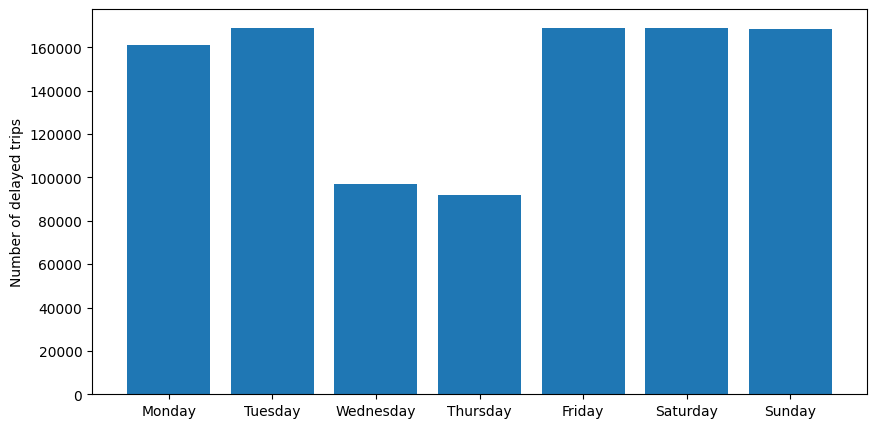

In [25]:
counts = TRAIN_SNCB.loc[TRAIN_SNCB['DELAYED']].groupby('DAY_OF_THE_WEEK').size()

# Create a bar chart with the counts
plt.figure(figsize=(10,5))
plt.bar(x=np.arange(7), height=counts.values)
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Number of delayed trips')

plt.show()

It seems like only Wednesday and Thursday in the month of February has a less train delays. I cannot conclude if this is significant or just random without further analysis

Since 70% of the SNCB is delayed it is good to further explore this

In [26]:
TRAIN_SNCB.head()

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,PLANNED_TIME_DEP,...,PTCAR_LG_NM_NL,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP,ORIGIN,DESTINATION,DAY_OF_THE_WEEK,DELAYED
4,2022-02-01,3844,IC 25,SNCB/NMBS,730,34,22:10:09,22:13:03,22:11:00,22:13:00,...,LIEGE-SAINT-LAMBERT,34,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,False
5,2022-02-01,3844,IC 25,SNCB/NMBS,728,34,22:16:03,22:17:09,22:16:00,22:17:00,...,LIEGE-CARRE,34,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True
6,2022-02-01,3844,IC 25,SNCB/NMBS,726,125,22:21:09,22:24:57,22:21:00,22:24:00,...,LIEGE-GUILLEMINS,34,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True
7,2022-02-01,3844,IC 25,SNCB/NMBS,1063,125,22:26:57,22:26:57,22:26:00,22:26:00,...,SCLESSIN,125,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True
8,2022-02-01,3844,IC 25,SNCB/NMBS,1148,125,22:29:07,22:29:07,22:28:00,22:28:00,...,TILLEUR,125,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True


In [33]:
TRAIN_SNCB.RELATION.unique()

['IC 25', 'IC 31', 'L B1-2', 'L C3', 'ICE', ..., 'L G3', 'L 28', 'L L2', 'L 37-2', 'L B9']
Length: 95
Categories (97, object): ['EURST', 'IC 01', 'IC 02', 'IC 03', ..., 'L L3', 'L L4', 'TGV', 'THAL']

Based on the definition of RELATION, i will make new column just to get the letter

In [40]:
TRAIN_SNCB['REL'] = TRAIN_SNCB.RELATION.apply(lambda x: x.split(' ')[0])

C:\Users\Jomari Arubio\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
TRAIN_SNCB['REL'].unique()

array(['IC', 'L', 'ICE', 'TGV', 'THAL', 'INT'], dtype=object)

Here I was able to extract the main relation of the data. 

- IC = trains connect Belgium’s large cities. These trains only stop at the biggest train stations and sometimes cross international borders.
- L = trains generally connect cities, but they also stop at every station along the route.
- EC, THA, TGV, ICE, EST Regular international trains, namely Eurocity, Thalys, TGV, ICE and Eurostar.

In [49]:
kru = TRAIN_SNCB[(TRAIN_SNCB['DELAYED'] == True) & (TRAIN_SNCB['REL'] == 'IC')]
kru.describe()

,PTCAR_NO,DELAY_ARR,DELAY_DEP
count,601669.000000,601669.000000,601669.000000
mean,625.646713,209.330674,208.449473
std,407.267369,427.799177,430.611018
min,6.000000,1.000000,-1033.000000
25%,232.000000,31.000000,29.000000
50%,578.000000,80.000000,79.000000
75%,913.000000,203.000000,203.000000
max,2089.000000,15012.000000,15012.000000


### NOTE:
- the average delay time for SNCB Operator is 188 seconds or 3.13 minutes, the maximum is 4.17 hrs
- the average delay time for SNCB Operator that is **IC relation is 209 seconds or 3.48 minutes, the max is 4.17 hrs**

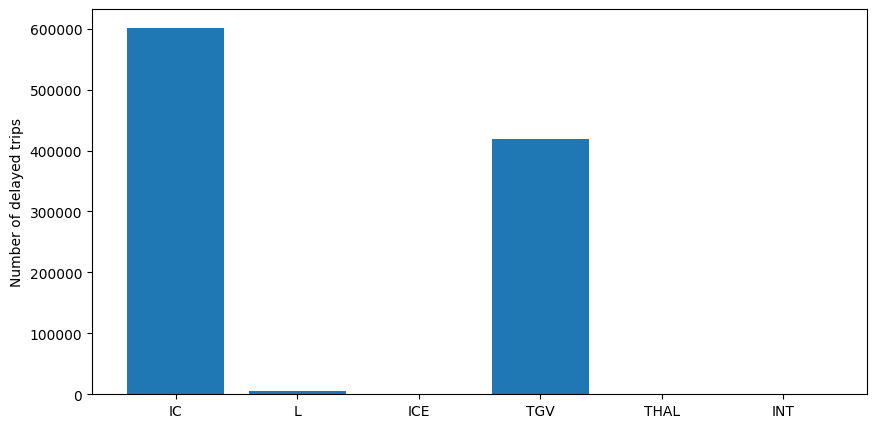

In [45]:
counts = TRAIN_SNCB.loc[TRAIN_SNCB['DELAYED']].groupby('REL').size()

# Create a bar chart with the counts
plt.figure(figsize=(10,5))
plt.bar(x=np.arange(6), height=counts.values)
plt.xticks(np.arange(6), ['IC', 'L', 'ICE', 'TGV', 'THAL', 'INT'])
plt.ylabel('Number of delayed trips')

plt.show()

In the figure above, we could see that most of the delays (601,669) delays happen with 'IC' Relation trains

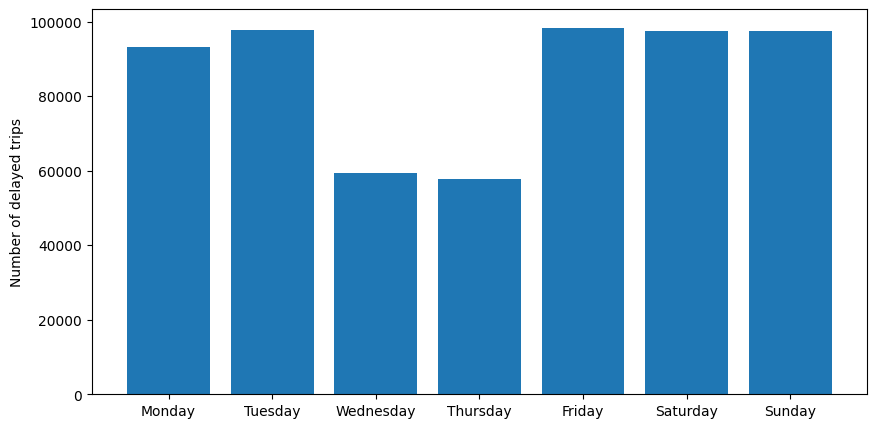

In [51]:
counts = kru.loc[kru['DELAYED']].groupby('DAY_OF_THE_WEEK').size()

# Create a bar chart with the counts
plt.figure(figsize=(10,5))
plt.bar(x=np.arange(7), height=counts.values)
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Number of delayed trips')

plt.show()

The figure above seems similar in the first figure DAY_OF_THE_WEEK vs. Number of Delayed trips, but here I only plot those who are "IC"

In [55]:
TRAIN_SNCB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444342 entries, 4 to 1716088
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   DATDEP            1444342 non-null  datetime64[ns]
 1   TRAIN_NO          1444342 non-null  category      
 2   RELATION          1444342 non-null  category      
 3   TRAIN_SERV        1444342 non-null  category      
 4   PTCAR_NO          1444342 non-null  int64         
 5   LINE_NO_DEP       1444342 non-null  object        
 6   REAL_TIME_ARR     1444342 non-null  object        
 7   REAL_TIME_DEP     1444342 non-null  object        
 8   PLANNED_TIME_ARR  1444342 non-null  object        
 9   PLANNED_TIME_DEP  1444342 non-null  object        
 10  DELAY_ARR         1444342 non-null  float64       
 11  DELAY_DEP         1444342 non-null  float64       
 12  PTCAR_LG_NM_NL    1444342 non-null  object        
 13  LINE_NO_ARR       1444342 non-null  object

## Correlation Matrix

- I will convert the categorical and object type in order to run a correlation analysis

In [63]:
TRAIN_SNCB.head()

,DATDEP,TRAIN_NO,RELATION,TRAIN_SERV,PTCAR_NO,LINE_NO_DEP,REAL_TIME_ARR,REAL_TIME_DEP,PLANNED_TIME_ARR,PLANNED_TIME_DEP,...,LINE_NO_ARR,PLANNED_DATE_ARR,PLANNED_DATE_DEP,REAL_DATE_ARR,REAL_DATE_DEP,ORIGIN,DESTINATION,DAY_OF_THE_WEEK,DELAYED,REL
4,2022-02-01,3844.0,IC 25,SNCB/NMBS,730,34,22:10:09,22:13:03,22:11:00,22:13:00,...,34,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,False,IC
5,2022-02-01,3844.0,IC 25,SNCB/NMBS,728,34,22:16:03,22:17:09,22:16:00,22:17:00,...,34,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True,IC
6,2022-02-01,3844.0,IC 25,SNCB/NMBS,726,125,22:21:09,22:24:57,22:21:00,22:24:00,...,34,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True,IC
7,2022-02-01,3844.0,IC 25,SNCB/NMBS,1063,125,22:26:57,22:26:57,22:26:00,22:26:00,...,125,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True,IC
8,2022-02-01,3844.0,IC 25,SNCB/NMBS,1148,125,22:29:07,22:29:07,22:28:00,22:28:00,...,125,2022-02-01,2022-02-01,2022-02-01,2022-02-01,HERSTAL,MONS,Tuesday,True,IC


### 2. EUROSTARFR Train Operator

In [19]:
TRAIN_EUROSTARFR = df[df["TRAIN_SERV"] == "EUROSTARFR"]
print('The shape of the EUROSTARFr is: ', TRAIN_EUROSTARFR.shape)

ngi = TRAIN_EUROSTARFR.DELAYED.value_counts()[True]
print('The total train delays in EUROSTARFR operator is:' , ngi)
ngii = ngi/1854
print("The total percentage of delays in the month of February is:", ngii)

The shape of the EUROSTARFr is:  (1854, 22)
The total train delays in EUROSTARFR operator is: 1072
The total percentage of delays in the month of February is: 0.5782092772384034


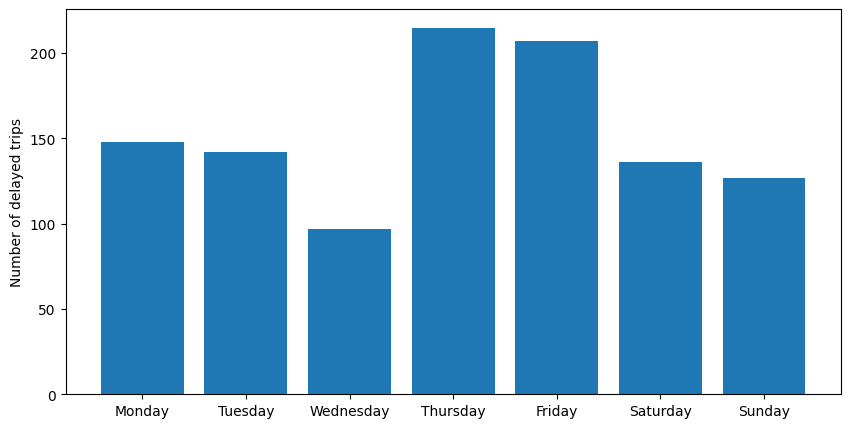

In [23]:
counts = TRAIN_EUROSTARFR.loc[TRAIN_EUROSTARFR['DELAYED']].groupby('DAY_OF_THE_WEEK').size()

# Create a bar chart with the counts
plt.figure(figsize=(10,5))
plt.bar(x=np.arange(7), height=counts.values)
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Number of delayed trips')

plt.show()

For the operator EUROSTARFR, most of the delays happen on Thursday and Friday. However, a 1854 data might be causing this diffence.

### 3. THI Train Operator

In [21]:
TRAIN_THI = df[df['TRAIN_SERV'] == 'THI-FACT']
print('The shape of the TRAIN_THI is: ', TRAIN_THI.shape)


ngi = TRAIN_THI.DELAYED.value_counts()[True]
print('The total train delays in TRAIN_THI operator is:' , ngi)
ngii = ngi/11397
print("The total percentage of delays in the month of February is:", ngii)

The shape of the TRAIN_THI is:  (11397, 22)
The total train delays in TRAIN_THI operator is: 7551
The total percentage of delays in the month of February is: 0.6625427744143195


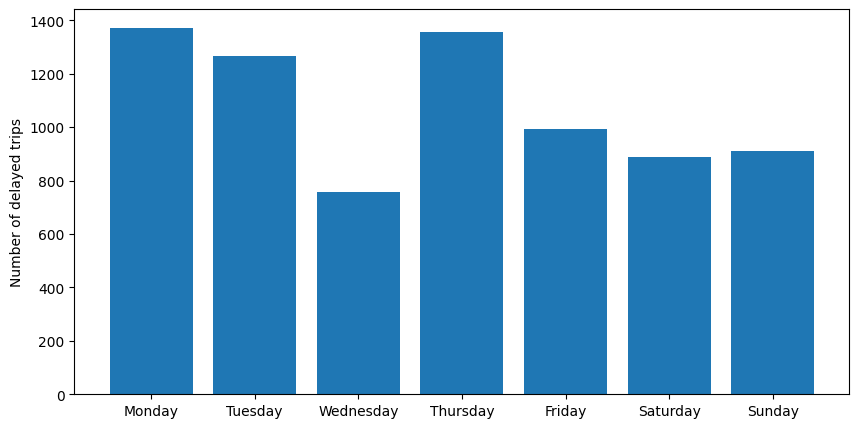

In [24]:
counts = TRAIN_THI.loc[TRAIN_THI['DELAYED']].groupby('DAY_OF_THE_WEEK').size()

# Create a bar chart with the counts
plt.figure(figsize=(10,5))
plt.bar(x=np.arange(7), height=counts.values)
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Number of delayed trips')

plt.show()

Lastly, for the operator TRAIN_THI, most of the delays happen on Monday and Thursday. As we could see three operators have different day of delays. 

#### Note: 
For the question 3, i think transforming PTCAR_LG_NM_NL into a dummy variables would help us quantify which of the stations/locations got more delays. 